In [1]:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'NanumGothicCoding'
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import missingno as msno
from plotnine import *
%matplotlib inline

### 공공 데이터 상권 정보 분석하기 -> https://www.data.go.kr/dataset/15012005/fileData.do

In [2]:
# 2016년 상권별 업종밀집 통계 -> 상권별 밀집도를 보여준다.
# encoding 속성을 생략하면 'utf-8'이 기본값으로 사용된다. 'utf-8'로 읽어오지 못한다. encoding 속성값을 'euc-kr','cp949'
# 'ms949'로 변경해서 읽는다.
#shop = pd.read_csv('./data/shop_2016.csv', encoding='ms949')
shop = pd.read_csv('./data/shop_2016.csv', encoding='euc-kr')
shop

상권명칭  상권번호    관리년월    대분류명    중분류명  과밀지수(밀집도)
0              강릉역광장_2  2523  201601      소매  가전제품소매     1.0818
1                구미역_3  1149  201601      소매  가전제품소매     0.8865
2       전북 전주시 중화산1동_1   768  201601      소매  가전제품소매     1.1757
3              충청북도청_2  1309  201601      소매  가전제품소매     0.3574
4        충북 청주시 복대1동_1  1311  201601      소매  가전제품소매     0.6849
...                ...   ...     ...     ...     ...        ...
805676    경남 양산시 덕계동_1   626  201612      소매     NaN     1.2906
805677   경북 구미시 신평1동_2  1143  201612  업종분류불능     NaN     0.5677
805678           안양역_5  1663  201612      소매     NaN     1.6597
805679             양산역   616  201612      소매     NaN     1.4103
805680           망포역_2  1473  201612  업종분류불능     NaN     0.7113

[805681 rows x 6 columns]

In [3]:
shop_2018_06 = pd.read_csv('./data/shop_201806_01.csv', encoding='euc-kr')
shop_2018_06.shape

(499328, 39)

In [4]:
shop_2018_06.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [5]:
# 분석 작업에 필요한 column만 추려낸다.
vies_colums = ['상호명','지점명','상권업종대분류명','상권업종중분류명','상권업종소분류코드','시도명','시군구명',
              '행정동명','법정동명','지번주소','도로명주소','경도','위도']
shop_2018_06[vies_colums].head()

상호명         지점명 상권업종대분류명  상권업종중분류명 상권업종소분류코드    시도명 시군구명  행정동명  \
0         와라와라호프         NaN       음식      유흥주점    Q09A01  서울특별시  강남구  대치1동   
1  커피빈코리아선릉로93길점  코리아선릉로93길점       음식    커피점/카페    Q12A01  서울특별시  강남구  역삼1동   
2           프로포즈         NaN       음식      유흥주점    Q09A01  서울특별시  금천구  독산3동   
3       싱싱커피&토스트         NaN       음식     패스트푸드    Q07A10  부산광역시  사상구   괘법동   
4       가락사우나내스낵         NaN    생활서비스  대중목욕탕/휴게    F09A02  서울특별시  송파구   석촌동   

  법정동명                  지번주소                 도로명주소          경도         위도  
0  대치동     서울특별시 강남구 대치동 604  서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1  역삼동  서울특별시 강남구 역삼동 696-42    서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2  독산동   서울특별시 금천구 독산동 162-1    서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3  괘법동     부산광역시 사상구 괘법동 578      부산광역시 사상구 괘감로 37  128.980455  35.159774  
4  석촌동     서울특별시 송파구 석촌동 256      서울특별시 송파구 가락로 71  127.104071  37.500249

In [6]:
shop_2018_06.isnull().sum()

상가업소번호            0
상호명               1
지점명          432587
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      28731
표준산업분류명       28731
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         86552
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        434501
건물관리번호            0
건물명          274150
도로명주소             0
구우편번호             0
신우편번호             9
동정보          455420
층정보          191133
호정보          427356
경도                0
위도                0
dtype: int64

<AxesSubplot:>

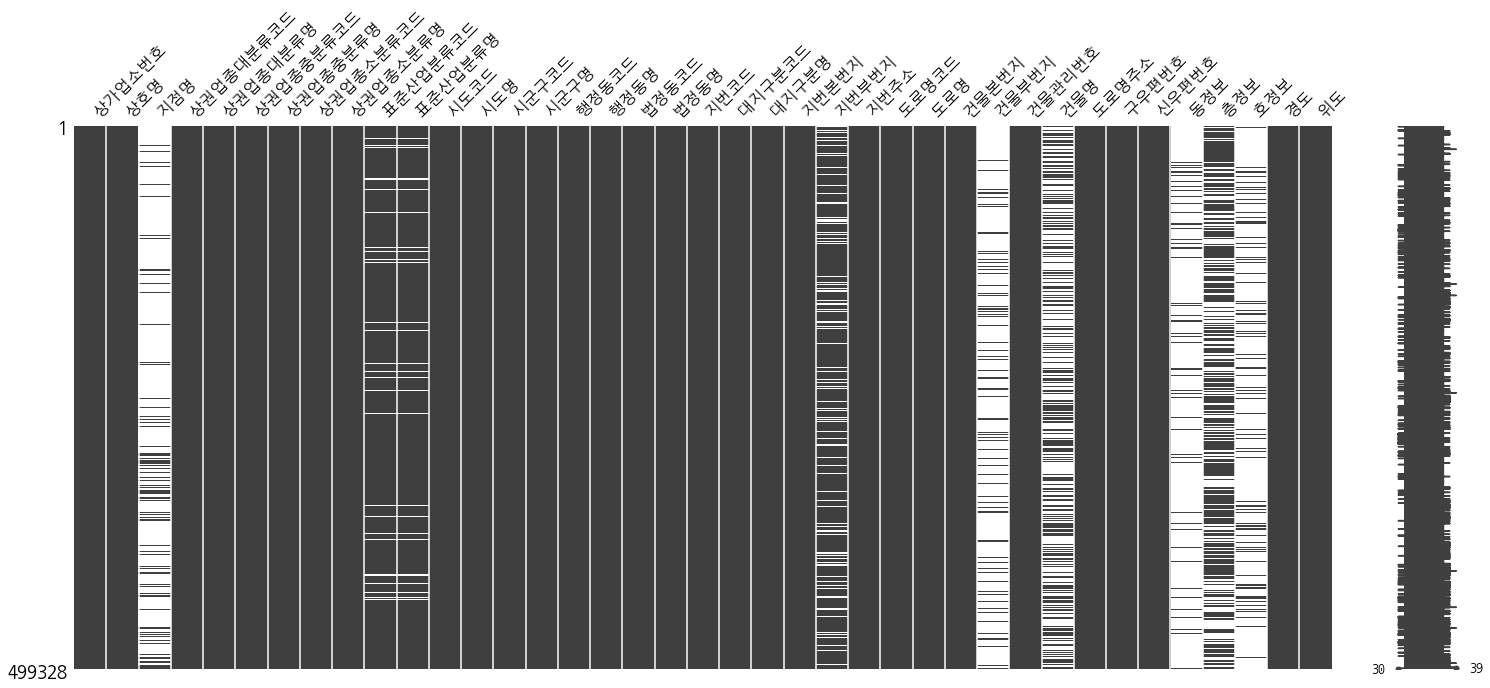

In [7]:
msno.matrix(shop_2018_06) # 하얀부분 : NaN

<AxesSubplot:>

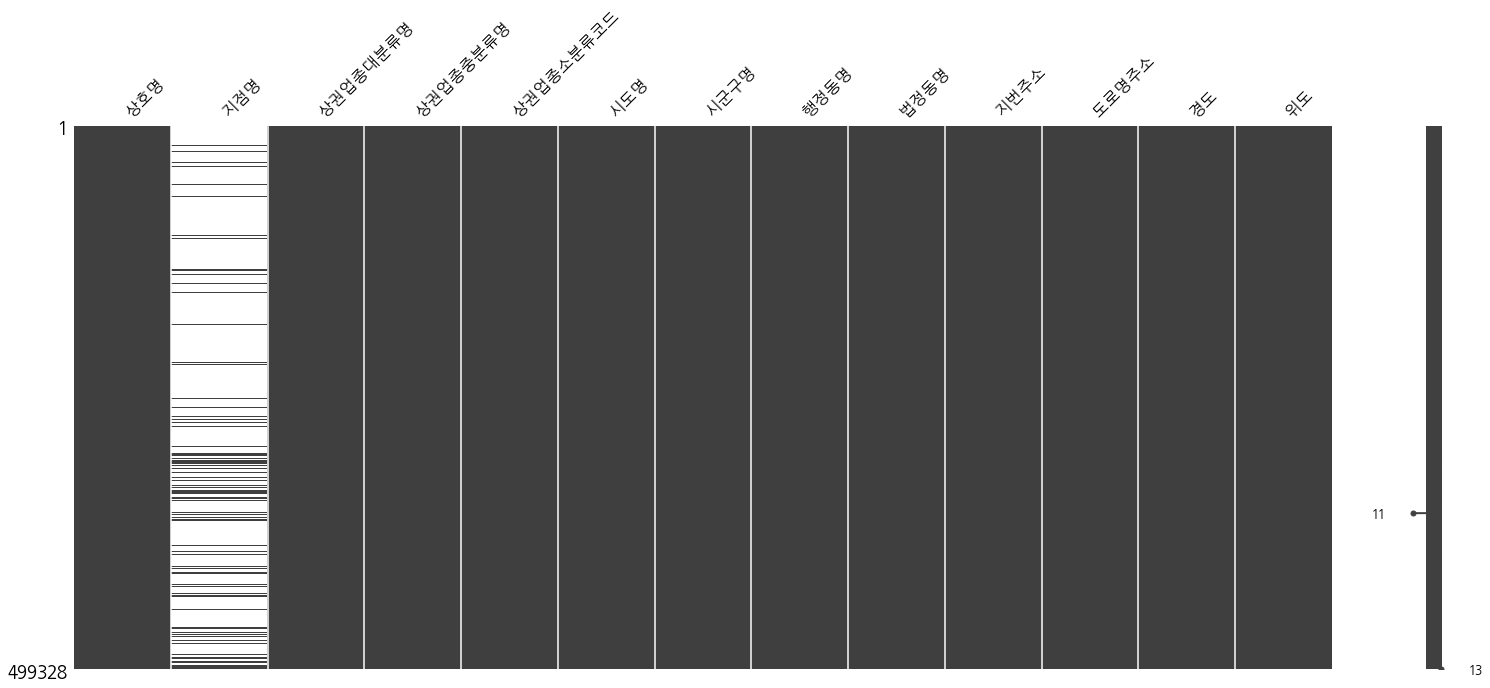

In [8]:
msno.matrix(shop_2018_06[vies_colums])

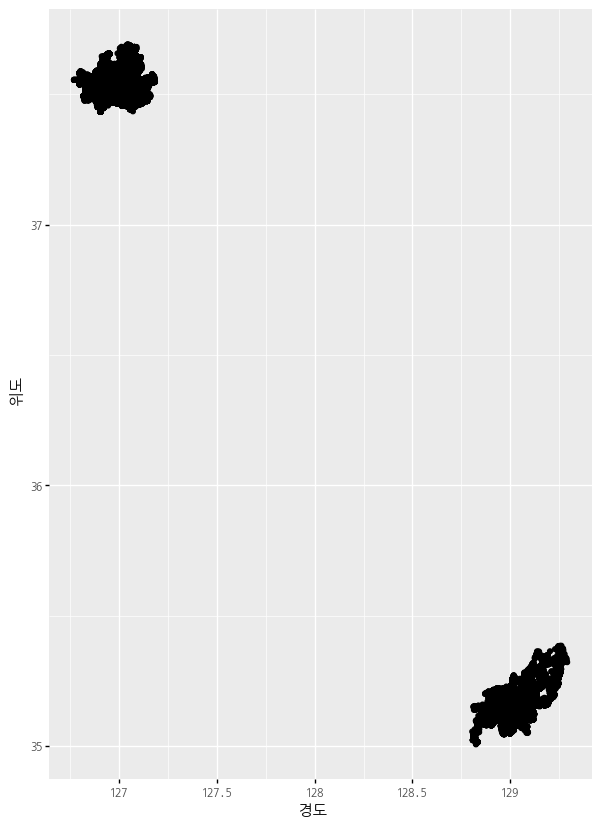

<ggplot: (164565983651)>

In [9]:
ggplot(shop_2018_06,aes(x='경도',y='위도'))\
+geom_point()\
+theme(text=element_text(family='NanumGothicCoding'),figure_size=(7,10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

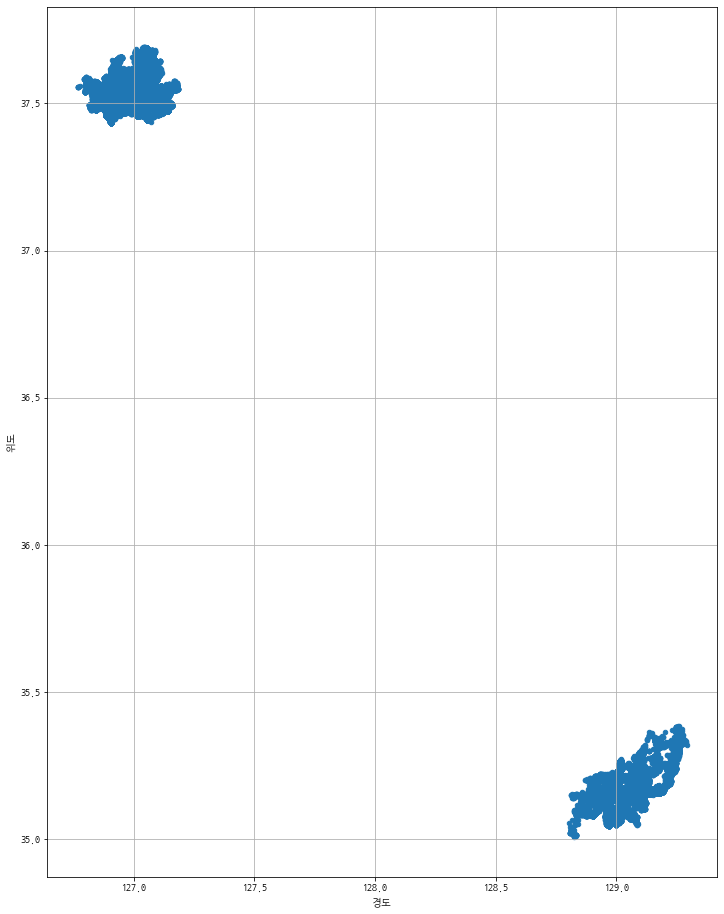

In [10]:
shop_2018_06.plot.scatter(x='경도',y='위도',grid=True, figsize=(12,16))  # 서울 부산

In [11]:
# 데이터를 시각화 시켜보니 서울과 부산만 있는 것 같다. -> 그래서 서울과 그 이외의 데이터로 나눈다.
shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')] # 서울로 시작
shop_seoul.head() 

상가업소번호            상호명         지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0  19905471         와라와라호프         NaN         Q       음식       Q09      유흥주점   
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q       음식       Q12    커피점/카페   
2  19911801           프로포즈         NaN         Q       음식       Q09      유흥주점   
4  19932756       가락사우나내스낵         NaN         F    생활서비스       F09  대중목욕탕/휴게   
5  19975850           허술한집         NaN         Q       음식       Q04        분식   

  상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...                     건물관리번호   건물명  \
0    Q09A01        호프/맥주   I56219  ...  1168010600106040000014378  대치상가   
1    Q12A01  커피전문점/카페/다방   I56220  ...  1168010100106960042022041   NaN   
2    Q09A01        호프/맥주   I56219  ...  1154510200101620001017748   NaN   
4    F09A02   사우나/증기탕/온천   S96121  ...  1171010500102560005010490   NaN   
5    Q04A01       라면김밥분식   I56194  ...  1150010800100450031005883   NaN   

                  도로명주소   구우편번호   신우편번호  동정보 층정보  호정보          경도         위도  
0  서울특별시 강남구 남부순환로 2933  135280  6280.0  NaN   1  NaN  127.061026  37.493922  
1    서울특별시 강남구 선릉로93길 6  135080  6149.0  NaN   1  NaN  127.047883  37.505675  
2    서울특별시 금천구 가산로 34-6  153010  8545.0  NaN   1  NaN  126.899220  37.471711  
4      서울특별시 송파구 가락로 71  138846  5690.0  NaN   1  NaN  127.104071  37.500249  
5    서울특별시 강서구 공항대로3길 9  157812  7619.0  NaN   1  NaN  126.809957  37.562013  

[5 rows x 39 columns]

In [12]:
# '~'는 ~가 아닌것을 의미한다.
shop_except_seoul = shop_2018_06.loc[~shop_2018_06['도로명주소'].str.startswith('서울')]
shop_except_seoul.head() 

상가업소번호       상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
3   19912201  싱싱커피&토스트  NaN         Q       음식       Q07    패스트푸드    Q07A10   
22  20047434    경부할인마트  NaN         D       소매       D03    종합소매점    D03A06   
23  20037352       마니쩜  NaN         Q       음식       Q09     유흥주점    Q09A01   
24  20038373     경주아구찜  NaN         Q       음식       Q03   일식/수산물    Q03A06   
30  20031733  동해제일산오징어  NaN         Q       음식       Q03   일식/수산물    Q03A13   

   상권업종소분류명 표준산업분류코드  ...                     건물관리번호       건물명  \
3     토스트전문   I56192  ...  2653010400105780000002037  산업용품유통상가   
22     종합소매   G47190  ...  2617010100107940681015812       NaN   
23    호프/맥주   I56219  ...  2623011000104500002043836     가남아파트   
24     아구전문   I56111  ...  2650010500103570010019103       NaN   
30   낙지/오징어   I56111  ...  2626010800113800002003460       NaN   

                       도로명주소   구우편번호    신우편번호  동정보 층정보  호정보          경도  \
3           부산광역시 사상구 괘감로 37  617726  46977.0  NaN   1   26  128.980455   
22          부산광역시 동구 망양로 593  601831  48716.0  NaN   1  NaN  129.034599   
23       부산광역시 부산진구 대학로 64-1  614010  47336.0  NaN   2  NaN  129.034302   
24       부산광역시 수영구 수영로 381-8  613010  48318.0  NaN   1  NaN  129.106330   
30  부산광역시 동래구 아시아드대로220번길 30  607060  47838.0  NaN   1  NaN  129.068324   

           위도  
3   35.159774  
22  35.123196  
23  35.150069  
24  35.141176  
30  35.202902  

[5 rows x 39 columns]

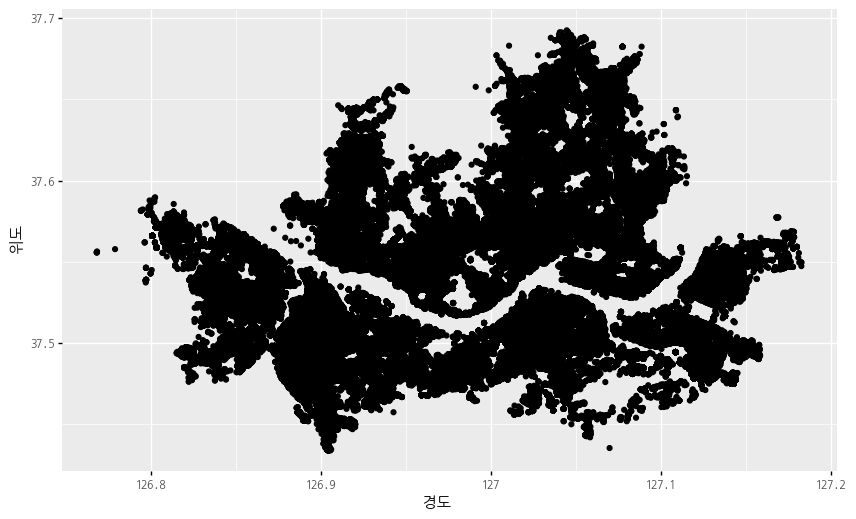

<ggplot: (164593717893)>

In [27]:
ggplot(shop_seoul,aes(x='경도',y='위도'))\
+geom_point()\
+theme(text=element_text(family='NanumGothicCoding'),figure_size=(10,6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

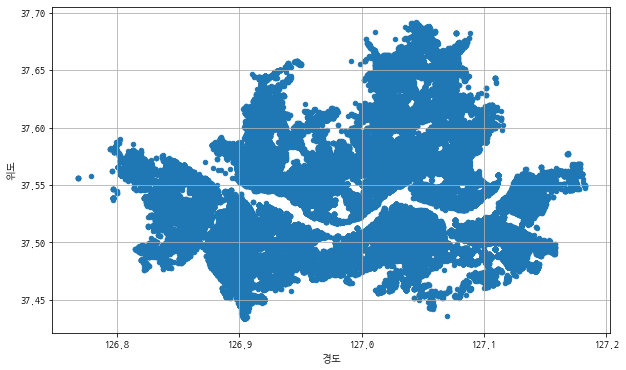

In [28]:
shop_seoul.plot.scatter(x='경도',y='위도', grid=True, figsize = (10,6))

In [29]:
# 데이터프레임의 도로명 주소를 활용해서 '시도','구군'열을 만든다.
# str.split() 메소드에 expand=True 옵션을 지정해서 구분자를 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도' 열과
# '구군' 열을 만든다.
# expand = True 옵션을 지정하면 구분자를 경계로 문자열을 구분해서 데이터프레임 타입으로 출력한다. -> 여러개의 열로 나눈다.
print(type(shop_seoul[:1]['도로명주소'].str.split(' ',expand = True)))
print("-"*70)
print(shop_seoul[:1]['도로명주소'].str.split(' ',expand = True)[0])
print("-"*70)
print(shop_seoul[:1]['도로명주소'].str.split(' ',expand = True)[1])
print("="*70)

shop_2018_06['시도'] = shop_2018_06['도로명주소'].str.split(' ',expand = True)[0]
shop_2018_06['구군'] = shop_2018_06['도로명주소'].str.split(' ',expand = True)[1]
shop_2018_06.columns

<class 'pandas.core.frame.DataFrame'>
----------------------------------------------------------------------
0    서울특별시
Name: 0, dtype: object
----------------------------------------------------------------------
0    강남구
Name: 1, dtype: object


Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도', '시도', '구군'],
      dtype='object')

In [30]:
# '시도' 열과 '구군' 열이 추가된 원본 데이터프레임에서 서울만 추출해 서울 데이터프레임을 다시 만들어준다.
shop_seoul = shop_seoul = shop_2018_06.loc[shop_2018_06['도로명주소'].str.startswith('서울')]

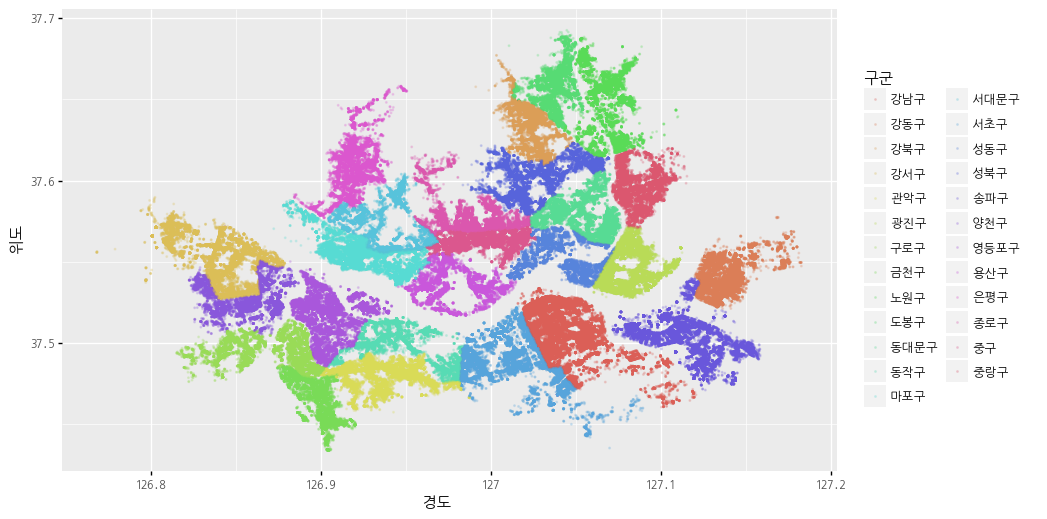

<ggplot: (164617022781)>

In [31]:
ggplot(shop_seoul,aes(x='경도',y='위도', color='구군'))\
    +geom_point(size = 0.2, alpha=0.2)\
    +theme(text=element_text(family='NanumGothicCoding'),figure_size=(10,6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

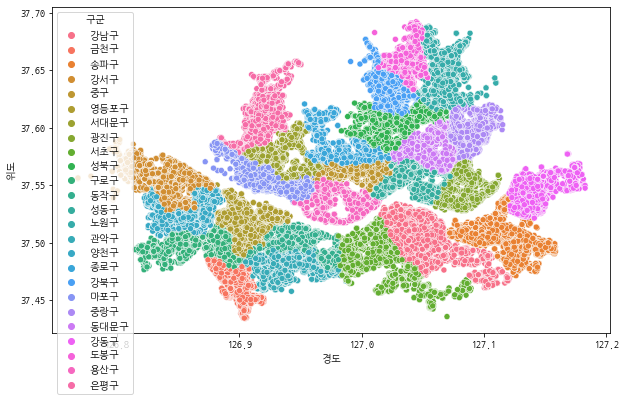

In [32]:
# seaborn 라이브러리를 이용한 시각화
plt.figure(figsize=(10,6))
sns.scatterplot(data=shop_seoul,x='경도',y='위도',hue='구군')

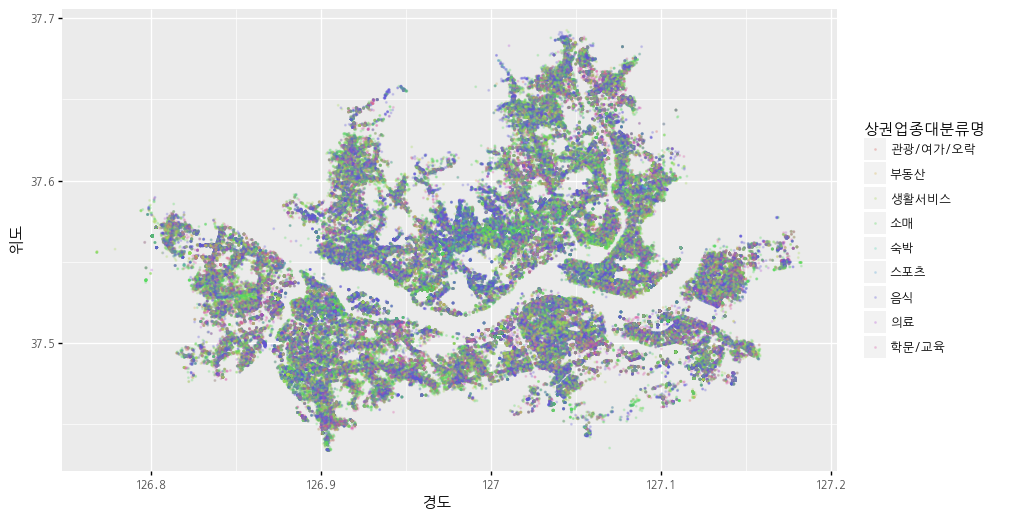

<ggplot: (164617929969)>

In [33]:
ggplot(shop_seoul,aes(x='경도',y='위도', color='상권업종대분류명'))\
    +geom_point(size = 0.2, alpha=0.2)\
    +theme(text=element_text(family='NanumGothicCoding'),figure_size=(10,6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

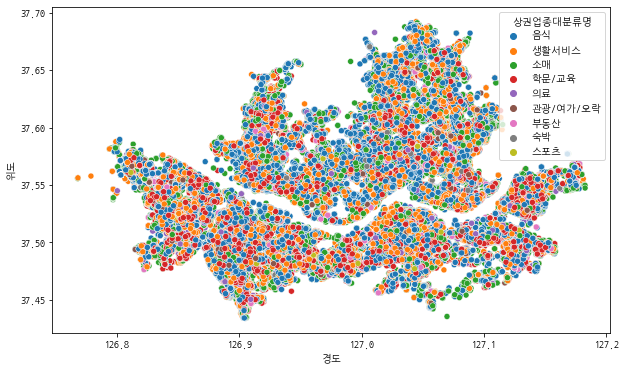

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=shop_seoul,x='경도',y='위도',hue='상권업종대분류명')

In [35]:
# 학뭔/교육과 관련된 정보 보기
shop_seoul_edu = shop_seoul[shop_seoul['상권업종대분류명']=='학문/교육']
shop_seoul_edu

상가업소번호       상호명      지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
52      20736806     안재형영어      NaN         R    학문/교육       R04       학원-어학   
67      20769711       정아트      NaN         R    학문/교육       R05   학원-음악미술무용   
86      20776515  GIA보석교육원      NaN         R    학문/교육       R03  학원-자격/국가고시   
120     20887860     경찰태권도      NaN         R    학문/교육       R07   학원-예능취미체육   
142     20907491   파랑새어린이집      NaN         R    학문/교육       R08        유아교육   
...          ...       ...      ...       ...      ...       ...         ...   
499268  16181119     점프셈교실     뉴스터디         R    학문/교육       R01   학원-보습교습입시   
499278  16180531     점프셈교실  IPN보떼미용         R    학문/교육       R02   학원-창업취업취미   
499288  16183617     점프셈교실    온누리보습         R    학문/교육       R01   학원-보습교습입시   
499289  16183551     점프셈교실    일신제2관         R    학문/교육       R01   학원-보습교습입시   
499315  16201164     점프셈교실    키스톤보습         R    학문/교육       R01   학원-보습교습입시   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드  ...                 도로명주소   구우편번호  \
52        R04A01  학원-외국어/어학   P85502  ...  서울특별시 양천구 목동서로 133-2  158050   
67        R05A01   서예/서화/미술   P85620  ...  서울특별시 강서구 양천로73가길 21  157861   
86        R03A11    학원-보석감정   P85659  ...    서울특별시 강남구 압구정로 320  135896   
120       R07A20       태권도장   P85611  ...      서울특별시 성북구 길음로 20  136110   
142       R08A02       어린이집   Q87210  ...     서울특별시 도봉구 덕릉로 329  132040   
...          ...        ...      ...  ...                   ...     ...   
499268    R01A01      학원-입시   P85501  ...     서울특별시 강서구 양천로 623  157861   
499278    R02A36    학원-네일아트   P85659  ...    서울특별시 강동구 천호대로 993  134874   
499288    R01A01      학원-입시   P85501  ...  서울특별시 관악구 문성로16가길 43  151898   
499289    R01A01      학원-입시   P85501  ...     서울특별시 영등포구 선유로 88  150862   
499315    R01A01      학원-입시   P85501  ...     서울특별시 관악구 조원로6길 1  151903   

         신우편번호  동정보  층정보  호정보          경도         위도     시도    구군  
52      7988.0  NaN    7  NaN  126.875973  37.531592  서울특별시   양천구  
67      7541.0  NaN    2  NaN  126.873645  37.550924  서울특별시   강서구  
86      6017.0  NaN    5  NaN  127.036437  37.528532  서울특별시   강남구  
120     2725.0  NaN    5  NaN  127.023020  37.604749  서울특별시   성북구  
142     1424.0  NaN    1  NaN  127.045486  37.644831  서울특별시   도봉구  
...        ...  ...  ...  ...         ...        ...    ...   ...  
499268  7545.0  NaN    3  NaN  126.867243  37.554476  서울특별시   강서구  
499278  5248.0  NaN    4  NaN  127.122785  37.539198  서울특별시   강동구  
499288  8864.0  NaN    3  NaN  126.914883  37.475271  서울특별시   관악구  
499289  7291.0  NaN    4    1  126.890194  37.521725  서울특별시  영등포구  
499315  8769.0  NaN  NaN  NaN  126.905305  37.483139  서울특별시   관악구  

[27717 rows x 41 columns]

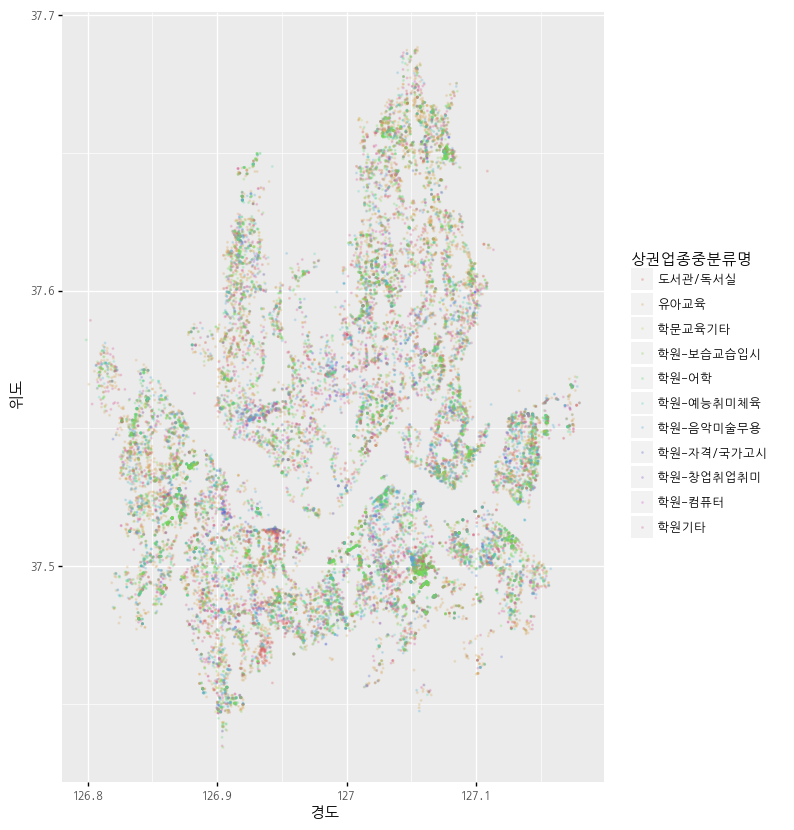

<ggplot: (164593712668)>

In [36]:
ggplot(shop_seoul_edu,aes(x='경도',y='위도',color='상권업종중분류명'))\
+geom_point(size = 0.2, alpha=0.2)\
+theme(text=element_text(family='NanumGothicCoding'),figure_size=(7,10))

<AxesSubplot:xlabel='경도', ylabel='위도'>

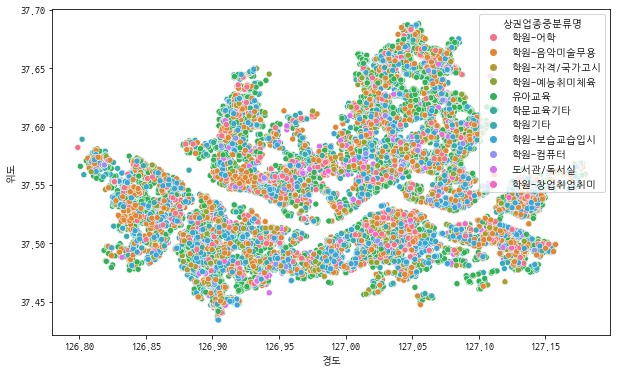

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=shop_seoul_edu,x='경도',y='위도',hue='상권업종중분류명')

In [38]:
# 학원-컴퓨터
shop_seoul_edu_computer = shop_seoul[shop_seoul['상권업종중분류명']=='학원-컴퓨터']
shop_seoul_edu_computer.shape

(215, 41)

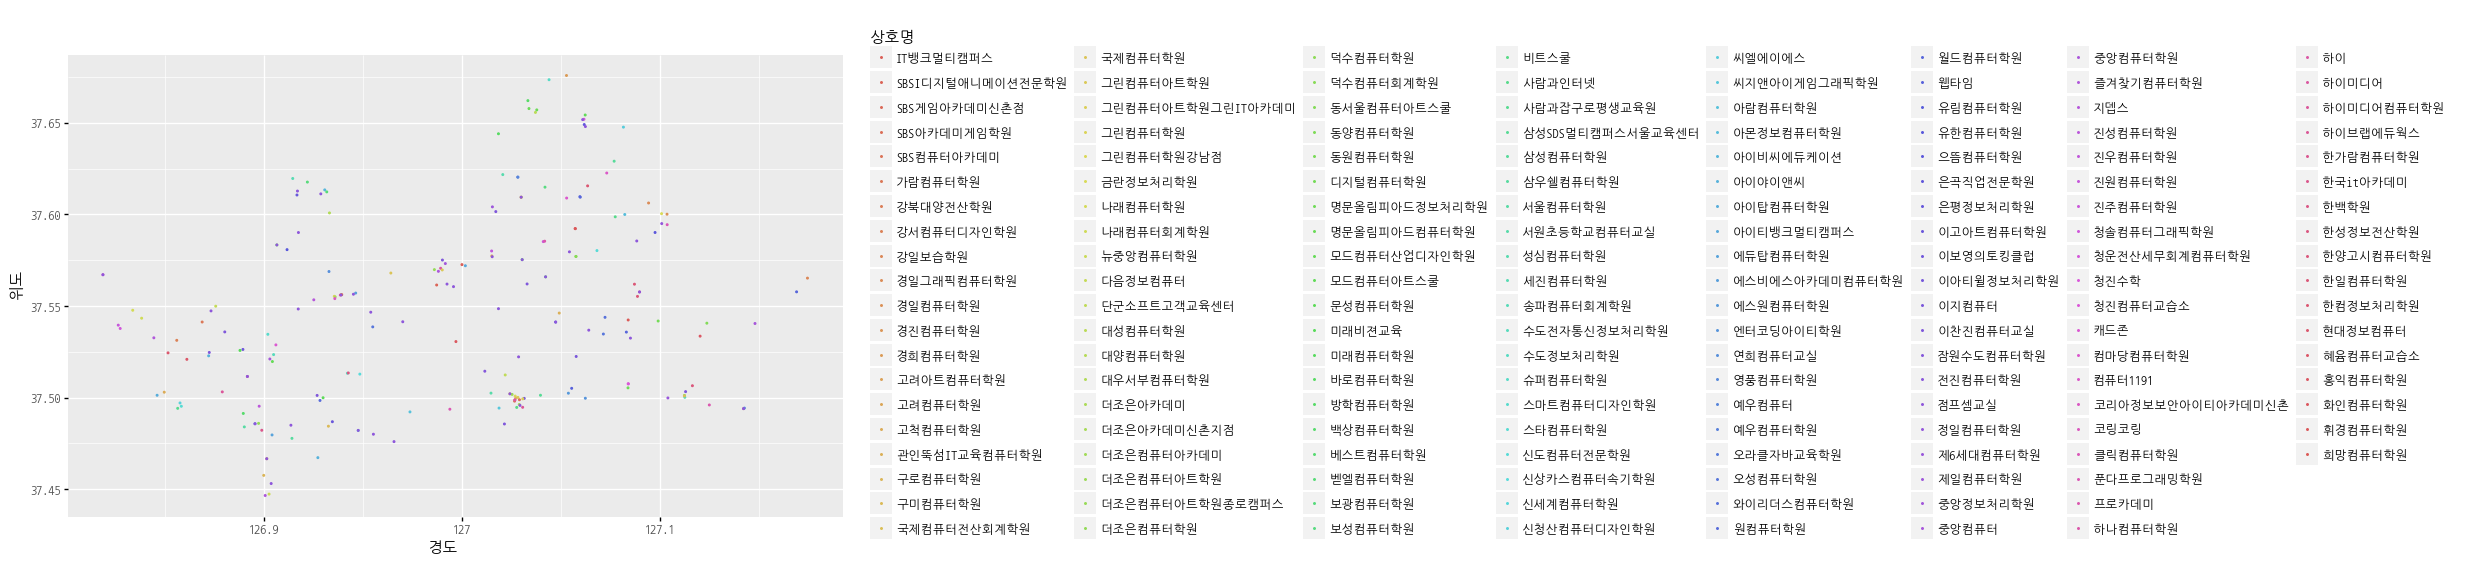

<ggplot: (164616453027)>

In [39]:
ggplot(shop_seoul_edu_computer,aes(x='경도',y='위도',color='상호명'))\
+geom_point(size = 0.2)\
+theme(text=element_text(family='NanumGothicCoding'),figure_size=(10,6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

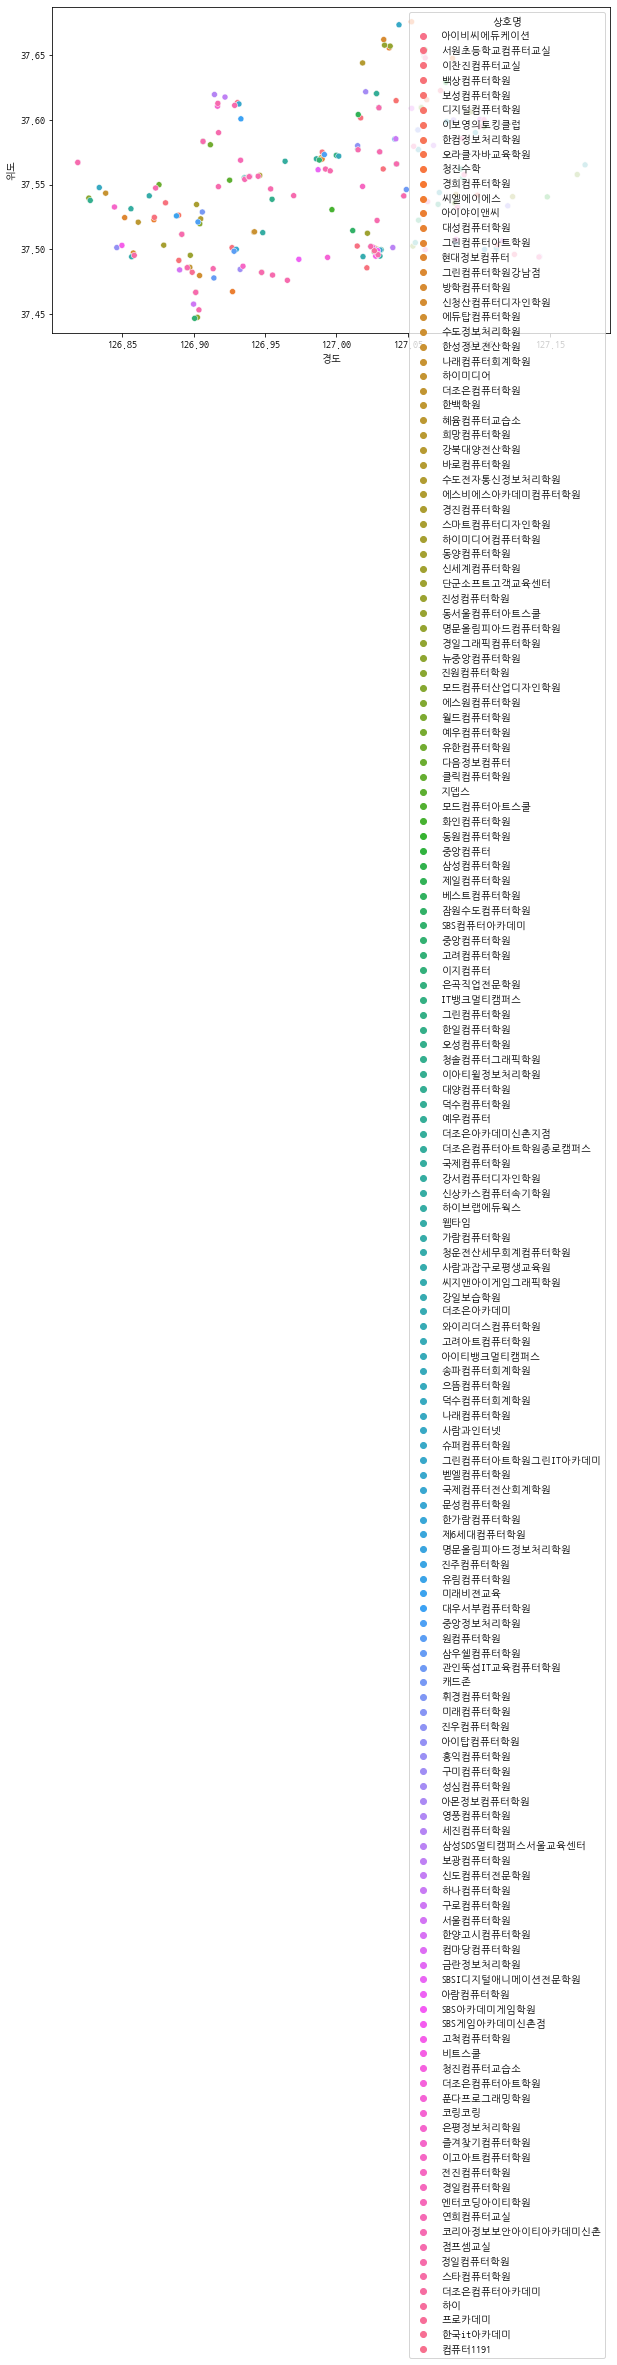

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=shop_seoul_edu_computer,x='경도',y='위도',hue='상호명')

In [41]:
import folium

In [42]:
data = shop_seoul_edu_computer
edu_map = folium.Map(location=[data['위도'].mean(),data['경도'].mean()], zoom_start=12)


for i in data.index:
    edu_name = data.loc[i,'상호명']+'-'+data.loc[i,'도로명주소']
    popup = folium.Popup(edu_name, max_width=500)
    folium.Marker(location=[data.loc[i,'위도'],data.loc[i,'경도']],popup=popup).add_to(edu_map)
    
edu_map.save('./output/edu_map.html')

edu_map

In [43]:
# 커피점/카페
shop_seoul_eat = shop_seoul[shop_seoul['상권업종중분류명']=='커피점/카페']
shop_seoul_eat.shape

(16349, 41)

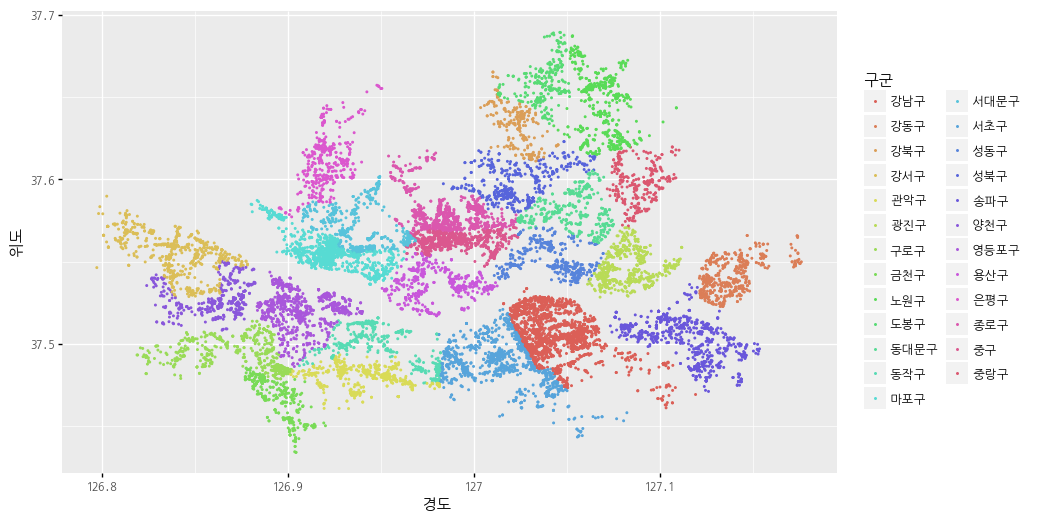

<ggplot: (164688989037)>

In [44]:
ggplot(shop_seoul_eat,aes(x='경도',y='위도',color='구군'))\
+geom_point(size = 0.2)\
+theme(text=element_text(family='NanumGothicCoding'),figure_size=(10,6))

<AxesSubplot:xlabel='경도', ylabel='위도'>

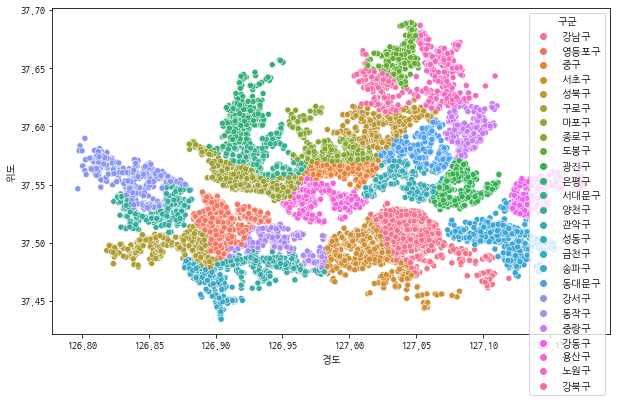

In [45]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=shop_seoul_eat,x='경도',y='위도',hue='구군')

In [46]:
data = shop_seoul_eat[shop_seoul_eat['구군']=='노원구']
edu_map = folium.Map(location=[data['위도'].mean(),data['경도'].mean()], zoom_start=16)


for i in data.index:
    edu_name = data.loc[i,'상호명']+'-'+data.loc[i,'도로명주소']
    popup = folium.Popup(edu_name, max_width=500)
    folium.Marker(location=[data.loc[i,'위도'],data.loc[i,'경도']],popup=popup).add_to(edu_map)
    
edu_map.save('./output/eat_map.html')

edu_map